In [1]:
pwd()

'/home/user/CODE/Bioinformatics/SingleCell_DataAnalysis/notebooks'

In [2]:
import os
os.chdir('/home/user/CODE/Bioinformatics/SingleCell_DataAnalysis/src/')
%run setup.py

Let us set some parameters

In [5]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=300, facecolor='white')

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==2.0.1 scikit-learn==1.2.2 statsmodels==0.14.0rc0 pynndescent==0.5.10


In [4]:
!pip install IProgress

In [6]:
# update requirements.txt
!pip freeze > requirements.txt

Create the results object

In [7]:
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

Read in the count matrix into an AnnData object, which holds many slots for annotations and different representations of the data. It also comes with its own HDF5-based file format: .h5ad.

'/home/user/CODE/Bioinformatics/SingleCell_DataAnalysis/src'

In [11]:
os.chdir('/home/user/CODE/Bioinformatics/SingleCell_DataAnalysis/data/')
adata = sc.read_10x_mtx(
    'filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... writing an h5ad cache file to speedup reading next time


In [12]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [13]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

# Preprocessing

Show those genes that yield the highest fraction of counts in each single cell, across all cells.

See: https://master.bioconductor.org/packages/release/workflows/html/simpleSingleCell.html#examining-gene-level-metrics
List of courses (I think all of them in R): https://master.bioconductor.org/help/course-materials/

normalizing counts per cell
    finished (0:00:00)


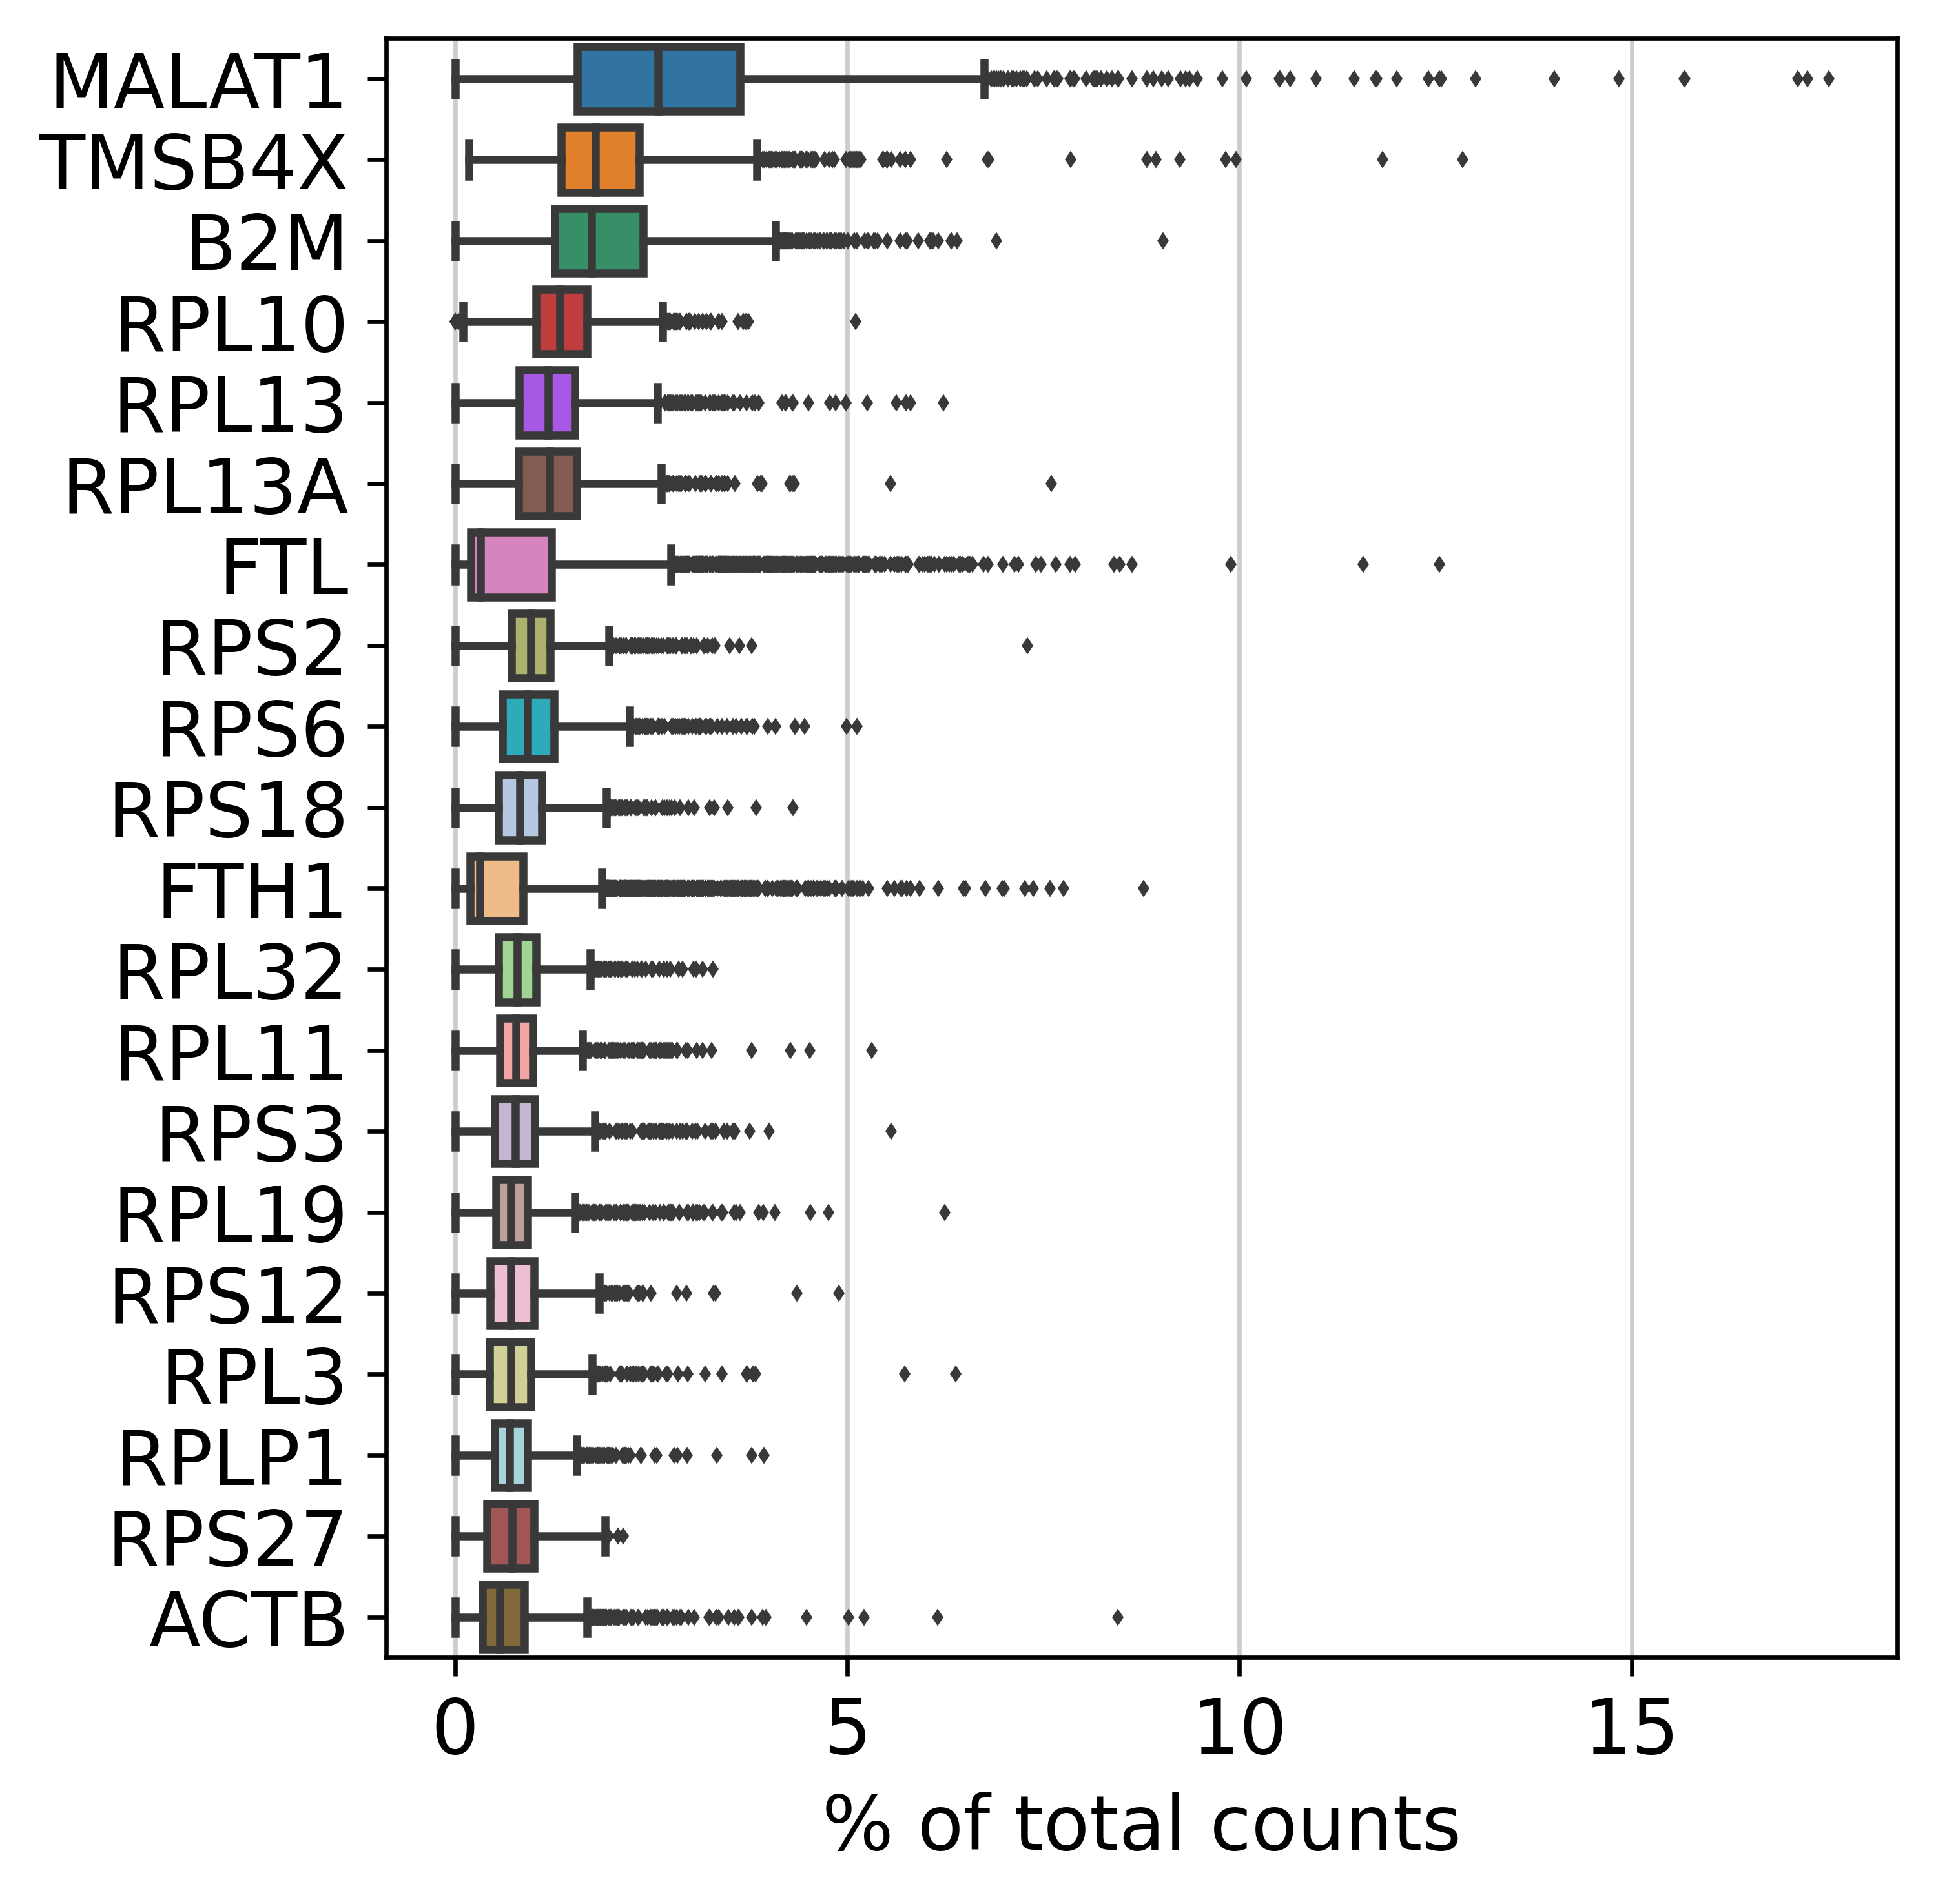

In [14]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [ ]:
# add and commit changes
!git add .
!git commit -m "add scanpy exploration 02"